In [4]:
import pandas as pd
df = pd.read_csv('SuicTweets.csv')
df.head()


,tweet,intention
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1


In [5]:
import re
import nltk
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
stopwords_en = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


In [6]:
mapper = {
    1: 'Suicide',
    0: 'Non-suicide'
}
df['etiqueta'] = df['intention'].map(mapper)
df.head()

,tweet,intention,etiqueta
0,my life is meaningless i just want to end my l...,1,Suicide
1,muttering i wanna die to myself daily for a fe...,1,Suicide
2,work slave i really feel like my only purpose ...,1,Suicide
3,i did something on the 2 of october i overdose...,1,Suicide
4,i feel like no one cares i just want to die ma...,1,Suicide


In [7]:
import contractions
from tqdm import tqdm
tqdm.pandas()

def preprocesamiento_texto(texto):
    texto = texto.lower()
    texto = contractions.fix(texto)
    texto = re.sub(r'[^a-z\s]','', texto)
    texto_tokenized = word_tokenize(texto)
    texto_no_stop = [token for token in texto_tokenized if token not in stopwords_en]
    final = [lemmatizer.lemmatize (word) for word in texto_no_stop]
    final = ' '.join(final)
    return final

In [8]:
df['clean_tweet'] = df['tweet'].progress_apply(preprocesamiento_texto)
df.head()

100%|██████████| 9119/9119 [00:03<00:00, 2407.24it/s]


,tweet,intention,etiqueta,clean_tweet
0,my life is meaningless i just want to end my l...,1,Suicide,life meaningless want end life badly life comp...
1,muttering i wanna die to myself daily for a fe...,1,Suicide,muttering want die daily month feel worthless ...
2,work slave i really feel like my only purpose ...,1,Suicide,work slave really feel like purpose life make ...
3,i did something on the 2 of october i overdose...,1,Suicide,something october overdosed felt alone horribl...
4,i feel like no one cares i just want to die ma...,1,Suicide,feel like one care want die maybe feel less lo...


In [9]:
x = df['clean_tweet']
y = df['intention']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7,random_state=101, stratify=y)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [12]:
tfidf_vectorizer = TfidfVectorizer()
x_train_vectorized = tfidf_vectorizer.fit_transform(x_train)
x_test_vectorized = tfidf_vectorizer.transform(x_test)

# RANDOMForest

In [30]:
from sklearn.ensemble import RandomForestClassifier
#paralelizacion
model = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model.fit(x_train_vectorized, y_train)
y_pred = model.predict(x_test_vectorized)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [26]:
model.score(x_train_vectorized, y_train)

0.9953000156666144

In [27]:
model.score(x_test_vectorized, y_test)


0.8983918128654971

In [28]:
print(classification_report(y_test, model.predict(x_test_vectorized)))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1536
           1       0.95      0.81      0.87      1200

    accuracy                           0.90      2736
   macro avg       0.91      0.89      0.89      2736
weighted avg       0.90      0.90      0.90      2736



<Axes: >

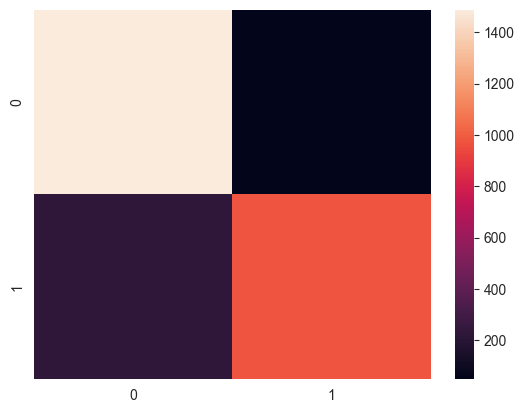

In [31]:
sns.heatmap(confusion_matrix(y_test, model.predict(x_test_vectorized)))

In [13]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train_vectorized, y_train)
y_pred = model.predict(x_test_vectorized)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [15]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1536
           1       0.83      0.82      0.83      1200

    accuracy                           0.85      2736
   macro avg       0.85      0.85      0.85      2736
weighted avg       0.85      0.85      0.85      2736

